# Apresentação
Integrantes: Douglas K. N. Ono, Thanuci Silva, Victor V. Borba

26/06/2021

O seguinte trabalho consiste e uma análise dos voos registrados nos EUA entre os anos de 2009 e 2018. Esta base possui aproximadamente 61 milhões de voos com diferentes informações que dizem a respeito à saída e à chegada da aeronave. Inicialmente realizamos uma análise exploratória a fim de identificar padrões e tendências, assim como preparar os dados para os cálculos dos modelos preditivos. Nesta etapa final do trabalho direcionaremos os modelos para receber as informações de um cliente de uma companhia aérea, considerando apenas as informações que ele possui no ticket de embarque.

In [1]:
import support_functions as sf
sf.set_spark_python()

from pyspark.sql import SparkSession
spark = SparkSession \
            .builder \
            .master("local[2]") \
            .appName("Atividade_final_grupo_DTV") \
            .getOrCreate()
spark

In [116]:
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark.sql.functions import *

import matplotlib.pyplot as plt
%matplotlib inline 

from pyspark.sql.functions import isnan, when, count, col

# Análise da Base de Dados

In [3]:
df_completo = spark.read.csv('../10_dados/projeto/20**.csv', header=True)

In [4]:
df_completo.printSchema()

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- TAXI_OUT: string (nullable = true)
 |-- WHEELS_OFF: string (nullable = true)
 |-- WHEELS_ON: string (nullable = true)
 |-- TAXI_IN: string (nullable = true)
 |-- CRS_ARR_TIME: string (nullable = true)
 |-- ARR_TIME: string (nullable = true)
 |-- ARR_DELAY: string (nullable = true)
 |-- CANCELLED: string (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: string (nullable = true)
 |-- CRS_ELAPSED_TIME: string (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: string (nullable = true)
 |-- AIR_TIME: string (nullable = true)
 |-- DISTANCE: string (nullable = true)
 |-- CARRIER_DELAY: string (nullable = true)
 |-- WEATHER_DELAY: strin

In [5]:
df_completo = df_completo.withColumn("FL_DATE", f.to_date(f.col("FL_DATE"),"yyyy-MM-dd")) \
                        .withColumn("DEP_DELAY", f.col("DEP_DELAY").cast("float")) \
                        .withColumn("OP_CARRIER_FL_NUM", f.col("OP_CARRIER_FL_NUM").cast("int")) \
                        .withColumn("CRS_DEP_TIME", f.col("CRS_DEP_TIME").cast("int")) \
                        .withColumn("DEP_TIME", f.col("DEP_TIME").cast("float")) \
                        .withColumn("DEP_DELAY", f.col("DEP_DELAY").cast("float")) \
                        .withColumn("TAXI_OUT", f.col("TAXI_OUT").cast("float")) \
                        .withColumn("WHEELS_OFF", f.col("WHEELS_OFF").cast("float")) \
                        .withColumn("WHEELS_ON", f.col("WHEELS_ON").cast("float")) \
                        .withColumn("TAXI_IN", f.col("TAXI_IN").cast("float")) \
                        .withColumn("CRS_ARR_TIME", f.col("CRS_ARR_TIME").cast("int")) \
                        .withColumn("ACTUAL_ELAPSED_TIME", f.col("ACTUAL_ELAPSED_TIME").cast("float")) \
                        .withColumn("AIR_TIME", f.col("AIR_TIME").cast("float")) \
                        .withColumn("DISTANCE", f.col("DISTANCE").cast("float")) \
                        .withColumn("CARRIER_DELAY", f.col("CARRIER_DELAY").cast("float")) \
                        .withColumn("WEATHER_DELAY", f.col("WEATHER_DELAY").cast("float")) \
                        .withColumn("ARR_TIME", f.col("ARR_TIME").cast("float")) \
                        .withColumn("ARR_DELAY", f.col("ARR_DELAY").cast("float")) \
                        .withColumn("NAS_DELAY", f.col("NAS_DELAY").cast("float")) \
                        .withColumn("SECURITY_DELAY", f.col("SECURITY_DELAY").cast("float")) \
                        .withColumn("LATE_AIRCRAFT_DELAY", f.col("LATE_AIRCRAFT_DELAY").cast("float")) \
                        .withColumn("CRS_ELAPSED_TIME", f.col("CRS_ELAPSED_TIME").cast("float")) \
                        .withColumn("CANCELLED", f.col("CANCELLED").cast("int"))

In [6]:
df_completo.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: float (nullable = true)
 |-- DEP_DELAY: float (nullable = true)
 |-- TAXI_OUT: float (nullable = true)
 |-- WHEELS_OFF: float (nullable = true)
 |-- WHEELS_ON: float (nullable = true)
 |-- TAXI_IN: float (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_TIME: float (nullable = true)
 |-- ARR_DELAY: float (nullable = true)
 |-- CANCELLED: integer (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: string (nullable = true)
 |-- CRS_ELAPSED_TIME: float (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: float (nullable = true)
 |-- AIR_TIME: float (nullable = true)
 |-- DISTANCE: float (nullable = true)
 |-- CARRIER_DELAY: float (nullable = true)
 |-- WEATHER_DELAY: float (nullable 

In [7]:
df_completo.limit(10).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,None
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,None
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,None
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,None
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,None
5,2009-01-01,XE,1212,ATL,EWR,1915,1913.0,-2.0,19.0,1932.0,...,147.0,130.0,96.0,745.0,NaN,NaN,NaN,NaN,NaN,None
6,2009-01-01,XE,1212,CLE,ATL,1645,1637.0,-8.0,12.0,1649.0,...,117.0,108.0,91.0,554.0,NaN,NaN,NaN,NaN,NaN,None
7,2009-01-01,XE,1214,DCA,EWR,1915,1908.0,-7.0,9.0,1917.0,...,80.0,79.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,None
8,2009-01-01,XE,1215,EWR,DCA,1715,1710.0,-5.0,28.0,1738.0,...,83.0,73.0,41.0,199.0,NaN,NaN,NaN,NaN,NaN,None
9,2009-01-01,XE,1217,EWR,DCA,1300,1255.0,-5.0,15.0,1310.0,...,68.0,61.0,39.0,199.0,NaN,NaN,NaN,NaN,NaN,None


In [8]:
total_flights = df_completo.count()
total_cancelled_flights = df_completo.filter(df_completo.CANCELLED == 1).count()
percentage_cancelled_flights = (total_cancelled_flights / total_flights) * 100
print(f'O numero total de voos ao longo dos anos é de {total_flights}, sendo que deste {total_cancelled_flights} são cancelados. Isto significa que {percentage_cancelled_flights:.3f}% estão cancelados. Portanto, como a porcentagem é muito baixa eles serão retirados da base de dados, considerando se para o problema apenas os voos com atrasos ')

O numero total de voos ao longo dos anos é de 61827740, sendo que deste 977551 são cancelados. Isto significa que 1.581% estão cancelados. Portanto, como a porcentagem é muito baixa eles serão retirados da base de dados, considerando se para o problema apenas os voos com atrasos 


In [9]:
df_completo.select('CANCELLED').distinct().toPandas()

,CANCELLED
0,1
1,2356
2,0


In [10]:
df_completo.filter(df_completo.CANCELLED == 2356).count()

1

In [12]:
sdf_1 = df_completo.filter(df_completo.CANCELLED == 0)
sdf_2 = sdf_1.drop('CANCELLED', 'CANCELLATION_CODE')
sdf_2.groupby('Unnamed: 27').count().toPandas()

,Unnamed: 27,count
0,None,60850187
1,1916.0,1


In [13]:
sdf_3 = sdf_2.drop('Unnamed: 27')
sdf_3.limit(10).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN
5,2009-01-01,XE,1212,ATL,EWR,1915,1913.0,-2.0,19.0,1932.0,...,0.0,147.0,130.0,96.0,745.0,NaN,NaN,NaN,NaN,NaN
6,2009-01-01,XE,1212,CLE,ATL,1645,1637.0,-8.0,12.0,1649.0,...,0.0,117.0,108.0,91.0,554.0,NaN,NaN,NaN,NaN,NaN
7,2009-01-01,XE,1214,DCA,EWR,1915,1908.0,-7.0,9.0,1917.0,...,0.0,80.0,79.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
8,2009-01-01,XE,1215,EWR,DCA,1715,1710.0,-5.0,28.0,1738.0,...,0.0,83.0,73.0,41.0,199.0,NaN,NaN,NaN,NaN,NaN
9,2009-01-01,XE,1217,EWR,DCA,1300,1255.0,-5.0,15.0,1310.0,...,0.0,68.0,61.0,39.0,199.0,NaN,NaN,NaN,NaN,NaN


In [14]:
sdf_3.select([count(when(col(c).isNull(), c)).alias(c) for c in sdf_3.columns]).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,0,0,0,0,0,1,0,4744,0,0,...,0,24,146137,146135,0,49404906,49404907,49404907,49404908,49404908


In [15]:
sdf_3 = sdf_3.na.fill(0)

Segundo pesquisas, um voo é considerado atrasado quando o atraso é maior do que 15 minutos. Os atrasos serão divididos em 4 grupos:

- Sem atraso
- Atraso baixo (15 min até 45 min)
- Atraso médio (45 min até 90 min)
- Atraso alto (90 min ou mais)

In [16]:
sdf_4 = sdf_3.withColumn('Delay_Status', 
            f.when((f.col('DEP_DELAY') > 15) & (f.col('DEP_DELAY') < 45), 'Low')
            .when((f.col('DEP_DELAY') >= 45) & (f.col('DEP_DELAY') < 90), 'Medium')
            .when(f.col('DEP_DELAY') >= 90, 'High')
            .otherwise('Ok'))
sdf_4.limit(10).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Delay_Status
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,0.0,0.0,0.0,0.0,0.0,Ok
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,0.0,0.0,0.0,0.0,0.0,Ok
5,2009-01-01,XE,1212,ATL,EWR,1915,1913.0,-2.0,19.0,1932.0,...,147.0,130.0,96.0,745.0,0.0,0.0,0.0,0.0,0.0,Ok
6,2009-01-01,XE,1212,CLE,ATL,1645,1637.0,-8.0,12.0,1649.0,...,117.0,108.0,91.0,554.0,0.0,0.0,0.0,0.0,0.0,Ok
7,2009-01-01,XE,1214,DCA,EWR,1915,1908.0,-7.0,9.0,1917.0,...,80.0,79.0,36.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok
8,2009-01-01,XE,1215,EWR,DCA,1715,1710.0,-5.0,28.0,1738.0,...,83.0,73.0,41.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok
9,2009-01-01,XE,1217,EWR,DCA,1300,1255.0,-5.0,15.0,1310.0,...,68.0,61.0,39.0,199.0,0.0,0.0,0.0,0.0,0.0,Ok


Aqui serão filtrados os voos atrasados para realização da análise exploratória abaixo

In [17]:
sdf_5 = sdf_4.filter(sdf_3.DEP_DELAY > 15.0)
sdf_5.limit(5).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Delay_Status
0,2009-01-01,XE,1233,EWR,ORD,1000,1035.0,35.0,14.0,1049.0,...,159.0,151.0,127.0,719.0,0.0,27.0,0.0,0.0,0.0,Low
1,2009-01-01,XE,1235,EWR,ORD,1343,1406.0,23.0,13.0,1419.0,...,160.0,144.0,124.0,719.0,0.0,0.0,0.0,0.0,0.0,Low
2,2009-01-01,XE,2044,IAH,CLT,1735,1800.0,25.0,9.0,1809.0,...,145.0,135.0,119.0,913.0,15.0,0.0,0.0,0.0,0.0,Low
3,2009-01-01,XE,2088,MAF,IAH,1030,1323.0,173.0,8.0,1331.0,...,89.0,100.0,79.0,429.0,173.0,0.0,11.0,0.0,0.0,High
4,2009-01-01,XE,2092,EWR,DTW,1400,1416.0,16.0,9.0,1425.0,...,124.0,109.0,91.0,487.0,0.0,0.0,0.0,0.0,0.0,Low


In [18]:
fly_months_count = sdf_5.groupBy(f.month("FL_DATE").alias("FL_DATE")).count().sort("FL_DATE")
fly_months_count.cache()
fly_months_count_PD = fly_months_count.toPandas()


fly_months_sum = sdf_5.groupBy(f.month("FL_DATE").alias("FL_DATE")).sum("DEP_DELAY").sort("FL_DATE")
fly_months_sum.cache()
fly_months_sum_PD = fly_months_sum.toPandas()

Ao analiasar ambos os gráficos é possível verificar um grande número de voos nos meses de Junho e Julho, que são meses de férias e Dezembro, onde temos feriados como natal e ano novo. Coincidentemente estes messes também possuem maior tempo de atrasos nos voos.

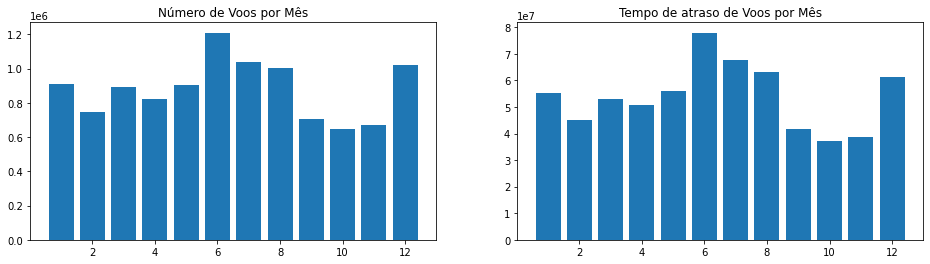

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].bar(fly_months_count_PD["FL_DATE"], fly_months_count_PD["count"])
axs[0].set_title('Número de Voos por Mês')

axs[1].bar(fly_months_sum_PD["FL_DATE"], fly_months_sum_PD["sum(DEP_DELAY)"])
axs[1].set_title('Tempo de atraso de Voos por Mês')

plt.show()

Como podemos verificar não há uma grande diferença de número de voos em nos anos, sempre mantendo uma média de 1000000 voos por ano

In [20]:
sdf_5.select(f.date_format('FL_DATE','yyyy').alias('Year')).groupby(['Year']).count() \
.orderBy(f.col('count').desc()).toPandas()

,Year,count
0,2018,1260629
1,2013,1182267
2,2014,1149341
3,2015,1066998
4,2010,1066558
5,2009,1001336
6,2011,1000359
7,2017,977676
8,2012,952532
9,2016,917883


In [21]:
op_carrier_total = sdf_5.groupby(['OP_CARRIER']).agg(f.count("DEP_DELAY").alias("Número de voos atrasados"),\
                                                     f.avg("DEP_DELAY").alias("Média de tempo de atraso"),\
                                                     f.max("DEP_DELAY").alias("Tempo máximo de atraso")
                                                     ).orderBy(f.col('Número de voos atrasados')).toPandas()
carrier_delay_status = sdf_5.groupby(['OP_CARRIER', 'Delay_Status']).agg(f.count("DEP_DELAY").alias("Número de voos atrasados")).toPandas().pivot(index='OP_CARRIER', columns='Delay_Status', values='Número de voos atrasados')
op_carrier_total.join(carrier_delay_status, on=['OP_CARRIER'], how='inner').nlargest(11, 'Número de voos atrasados', keep='first')

,OP_CARRIER,Número de voos atrasados,Média de tempo de atraso,Tempo máximo de atraso,High,Low,Medium
22,WN,2541219,49.003880,843.0,306665,1649311,585243
21,AA,1159042,63.636809,2755.0,220370,619527,319145
20,DL,1091531,63.237390,1289.0,203139,631573,256819
19,OO,969134,68.747358,2710.0,219884,472937,276313
18,EV,931948,71.691284,1816.0,235608,428213,268127
17,UA,888491,65.727675,1553.0,191567,459174,237750
16,MQ,566865,60.491041,1638.0,98231,310129,158505
15,B6,538553,66.889446,1489.0,123198,266291,149064
14,US,313924,55.003141,981.0,49165,181468,83291
13,F9,185083,64.825959,1254.0,37754,100771,46558


In [22]:
sdf_6 = sdf_4.withColumn('ROUTE', f.concat(f.col('ORIGIN'), f.lit(' '), f.col('DEST')))
top_delayed_routes = sdf_6.groupBy('ROUTE').count().sort(f.desc("count")).limit(10).toPandas()

Abaixo há as rotas que há mais registros de atrasos ao longo dos anos. Podemos verificar que o aeroporto de Los Angeles aparece em 6 rotas, ao realizer uma pesquisa, verificamos que o aeroporto de Los Angeles é o 5º aeroporto mais movimentado dos EUA.

Fonte: https://www.statista.com/statistics/185679/passengers-boarded-at-the-leading-25-us-airports/

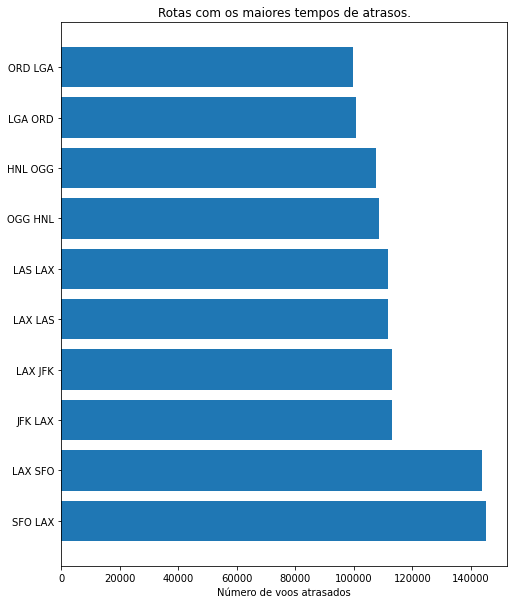

In [23]:
fig, ax = plt.subplots(figsize=(8,10))
ax.barh(top_delayed_routes['ROUTE'], top_delayed_routes['count'])
ax.set_title('Rotas com os maiores tempos de atrasos.')
ax.set_xlabel('Número de voos atrasados')
plt.show()

In [24]:
def what_time (x):
    comprimento = len(str(x[1]))
    if comprimento == 3:
        return (int(str(x[1])[:1]), 1)
    else:
        return (int(str(x[1])[:2]), 1)

Assim como a data do vôo, podemos verificar se há horários no dia com maiores atrasos, então este fator pode ser considerado para o modelo.

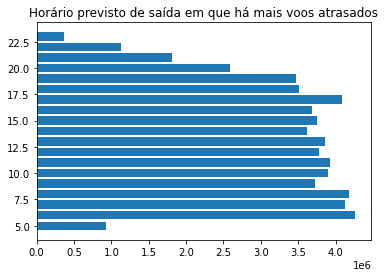

In [25]:
sdf_7 = sdf_4.drop('DISTANCE')

rdd = sdf_7.select("DEP_DELAY", "CRS_DEP_TIME").rdd
rdd_2 = rdd.map(lambda x: what_time(x))
rdd_3 = rdd_2.reduceByKey(lambda x , y: x + y)
rdd_4 = rdd_3.takeOrdered(19, key = lambda x: -x[1])

plt.figsize=(8,10)
plt.barh([x[0] for x in rdd_4], [x[1] for x in rdd_4])
plt.title("Horário previsto de saída em que há mais voos atrasados")
plt.show()

Apesar do tempo de partida estar diretamente ligado com o tempo de atraso do vôo em relação ao seu tempo estimado de partida, este fator não influencia se o vôo pode atrasar ou não

In [128]:
rdd_5 = sdf_7.select("DEP_DELAY", "DEP_TIME").rdd
rdd_6 = rdd_5.map(lambda x: what_time(x))
rdd_7 = rdd_6.reduceByKey(lambda x , y: x + y)
rdd_8 = rdd_7.takeOrdered(19, key = lambda x: -x[1])

my_schema = StructType([ \
    StructField('DEP_TIME', IntegerType(), True), \
    StructField('DEP_DELAY', IntegerType(), True)
])
                                       
sdf = spark.createDataFrame(rdd_8, schema = my_schema)
sdf.sort(f.desc("DEP_DELAY")).limit(10).toPandas()

,DEP_TIME,DEP_DELAY
0,17,3907582
1,11,3873997
2,10,3824547
3,13,3737037
4,12,3729365
5,15,3687502
6,16,3660306
7,14,3617946
8,18,3491661
9,19,3477945


In [127]:
rdd_9 = sdf_7.select("DEP_DELAY", "ARR_TIME").rdd
rdd_10 = rdd_9.map(lambda x: what_time(x))
rdd_11 = rdd_10.reduceByKey(lambda x , y: x + y)
rdd_12 = rdd_11.takeOrdered(19, key = lambda x: -x[1])

my_schema = StructType([ \
    StructField('ARR_TIME', IntegerType(), True), \
    StructField('DEP_DELAY', IntegerType(), True)
])
                                       
sdf = spark.createDataFrame(rdd_12, schema = my_schema)
sdf.sort(f.desc("DEP_DELAY")).limit(10).toPandas()

,ARR_TIME,DEP_DELAY
0,16,3981640
1,18,3894607
2,10,3817151
3,20,3787847
4,12,3750531
5,14,3742507
6,17,3735591
7,11,3726985
8,13,3701345
9,19,3683395


In [28]:
sdf_8 = sdf_7.drop('ARR_DELAY', 'ARR_TIME')
sdf_9 = sdf_8.where(f.col('DEP_DELAY') >= 0)

# Preparação para a modelagem

Nesta etapa, as variáveis foram retiradas da base de dados porque elas não estarão disponíveis no momento que o modelo preditivo for utilizado. Ou seja, elas são obtidas somente depois que o evento de fato ocorrer. Como mencionado inicialmente, estamos considerando como utilizador deste modelo, um cliente de uma companhia aérea e as informações que ele possue no ticket de embarque.

- DEP_TIME: Horário de embarque
- DEP_DELAY: Tempo de atraso para o embarque
- WHEELS_OFF: Horário em que as rodas do avião saíram do chão
- WHEELS_ON: Horário em que as rodas do avião tocaram no chão
- TAXI_OUT: Tempo entre o embarque e a saída das rodas do avião do chão
- TAXI_IN: Tempo entre as rodas do avião tocarem o chão e o desembarque
- DIVERTED: Se a aeronave pousou em um aeroporto diferente do previsto
- ACTUAL_ELAPSED_TIME: Soma do WHEELS_OFF, WHEELS_ON, TAXI_OUT e TAXI_IN
- AIR_TIME: Tempo da aeronave no ar
- NAS_DELAY: Tempo de atraso causado pelo sistema de ar
- CARRIER_DELAY: Tempo de atraso causado pela companhia aérea
- SECURITY_DELAY: Tempo de atraso causado pela segurança
- LATE_AIRCRAFT_DELAY: Tempo de atraso causado pelo atraso do avião no voo anterior
- WEATHER_DELAY: Tempo de atraso causado pelo clima

In [29]:
sdf_10 = sdf_9.drop('DEP_TIME','DEP_DELAY','WHEELS_OFF','WHEELS_ON', 'TAXI_OUT', \
                    'TAXI_IN', 'DIVERTED', 'CARRIER_DELAY', 'AIR_TIME', 'NAS_DELAY', \
                    'ACTUAL_ELAPSED_TIME', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY')
sdf_10.limit(5).toPandas()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,Delay_Status
0,2009-01-01,XE,1208,DCA,EWR,1240,1357,77.0,Ok
1,2009-01-01,XE,1233,EWR,ORD,1000,1139,159.0,Low
2,2009-01-01,XE,1234,ORD,EWR,1230,1559,149.0,Ok
3,2009-01-01,XE,1235,EWR,ORD,1343,1523,160.0,Low
4,2009-01-01,XE,1266,EWR,ATL,630,911,161.0,Ok


O número do voo é uma informação irrelevante para o modelo além de ter a possibilidade de ser alterado entre um voo e outro.

In [30]:
sdf_11 = sdf_10.drop('OP_CARRIER_FL_NUM')
sdf_11.limit(10).toPandas()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,Delay_Status
0,2009-01-01,XE,DCA,EWR,1240,1357,77.0,Ok
1,2009-01-01,XE,EWR,ORD,1000,1139,159.0,Low
2,2009-01-01,XE,ORD,EWR,1230,1559,149.0,Ok
3,2009-01-01,XE,EWR,ORD,1343,1523,160.0,Low
4,2009-01-01,XE,EWR,ATL,630,911,161.0,Ok
5,2009-01-01,XE,JAN,IAH,1415,1538,83.0,Ok
6,2009-01-01,XE,IAH,ABQ,1445,1604,139.0,Ok
7,2009-01-01,XE,IAH,TYS,1900,2204,124.0,Ok
8,2009-01-01,XE,IAH,CVG,1330,1647,137.0,Ok
9,2009-01-01,XE,IAH,BHM,1905,2047,102.0,Ok


Afim de aumentar a acurácia dos modelos, separamos a variável preditora ``FL_DATE`` que representa a data do voo em ano, mês e dia.

In [31]:
sdf_12 = sdf_11.withColumn("Year", f.year(f.col("FL_DATE"))) \
               .withColumn("Month", f.month(f.col("FL_DATE"))) \
               .withColumn("Day", f.dayofmonth(f.col("FL_DATE")))

sdf_13 = sdf_12.drop('FL_DATE')
sdf_13.limit(10).toPandas()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,Delay_Status,Year,Month,Day
0,XE,DCA,EWR,1240,1357,77.0,Ok,2009,1,1
1,XE,EWR,ORD,1000,1139,159.0,Low,2009,1,1
2,XE,ORD,EWR,1230,1559,149.0,Ok,2009,1,1
3,XE,EWR,ORD,1343,1523,160.0,Low,2009,1,1
4,XE,EWR,ATL,630,911,161.0,Ok,2009,1,1
5,XE,JAN,IAH,1415,1538,83.0,Ok,2009,1,1
6,XE,IAH,ABQ,1445,1604,139.0,Ok,2009,1,1
7,XE,IAH,TYS,1900,2204,124.0,Ok,2009,1,1
8,XE,IAH,CVG,1330,1647,137.0,Ok,2009,1,1
9,XE,IAH,BHM,1905,2047,102.0,Ok,2009,1,1


In [32]:
sdf_13.printSchema()

root
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- CRS_ELAPSED_TIME: float (nullable = false)
 |-- Delay_Status: string (nullable = false)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)



# Modelagem

## Separação entre treino e teste

In [33]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import VectorAssembler

categoricalCols = ['OP_CARRIER', 'ORIGIN', 'DEST']
numericCols = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'Year', 'Month', 'Day']
indexOutputCols = [x + "Index" for x in categoricalCols]
oneOutputCols = [x + "OHE" for x in categoricalCols]

In [34]:
stringIndexer = StringIndexer(inputCols = categoricalCols, 
                             outputCols = indexOutputCols, 
                             handleInvalid = 'skip')
oheEncoder = OneHotEncoder(inputCols = indexOutputCols,
                           outputCols = oneOutputCols)
assemblerInputs = oneOutputCols + numericCols

vecAssembler = VectorAssembler(inputCols = assemblerInputs,
                              outputCol = 'features')

oheEncoder.fit(stringIndexer.fit(sdf_13).transform(sdf_13)) \
.transform(stringIndexer.fit(sdf_13).transform(sdf_13))

DataFrame[OP_CARRIER: string, ORIGIN: string, DEST: string, CRS_DEP_TIME: int, CRS_ARR_TIME: int, CRS_ELAPSED_TIME: float, Delay_Status: string, Year: int, Month: int, Day: int, OP_CARRIERIndex: double, ORIGINIndex: double, DESTIndex: double, OP_CARRIEROHE: vector, ORIGINOHE: vector, DESTOHE: vector]

In [35]:
labelIndexer = StringIndexer(inputCol="Delay_Status", outputCol="indexedDelay").fit(sdf_13)

In [36]:
train, test = sdf_13.randomSplit([0.7, 0.3], seed = 919)

In [37]:
print(abdcasd)

NameError: name 'abdcasd' is not defined

## Modelos

In [41]:
from pyspark.ml import Pipeline
from pyspark.ml import PipelineModel
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

### Regressão Logística

In [42]:
Model_evaluator = MulticlassClassificationEvaluator(
    predictionCol= 'prediction',
    labelCol= 'indexedDelay', 
    metricName= 'accuracy')

In [ ]:
lr = LogisticRegression(labelCol = 'indexedDelay', featuresCol = 'features', \
                        maxIter=50, family="multinomial")
pipeline_lr = Pipeline(stages = [labelIndexer, stringIndexer, oheEncoder, vecAssembler, lr])
pipelineModel_lr = pipeline_lr.fit(train)

In [44]:
pipelineModel_lr = PipelineModel.load("/tmp/lr")

In [45]:
pred_lr = pipelineModel_lr.transform(test)
pred_lr.groupby("prediction").count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|7770838|
|       1.0|  27508|
|       3.0|   1350|
|       2.0|   3909|
+----------+-------+



In [ ]:
pipelineModel_lr.save("/tmp/lr")

In [47]:
accuracy_lr = Model_evaluator.evaluate(pred_lr)
print('Acurácia da Regressão Logística =', accuracy_lr * 100)

Acurácia da Regressão Logística = 59.353619256740956


### Árvore de Decisão

In [ ]:
dt = DecisionTreeClassifier(labelCol = 'indexedDelay', featuresCol = 'features')
pipeline_dt = Pipeline(stages = [labelIndexer, stringIndexer, oheEncoder, vecAssembler, dt])
pipelineModel_dt = pipeline_dt.fit(train)

In [48]:
pipelineModel_dt = PipelineModel.load("/tmp/dt")

In [49]:
pred_dt = pipelineModel_dt.transform(test)
pred_dt.groupby("prediction").count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|7800545|
|       3.0|   3060|
+----------+-------+



In [ ]:
pipelineModel_dt.save("/tmp/dt")

In [50]:
accuracy_dt = Model_evaluator.evaluate(pred_dt)
print('Acurácia da Árvore de Decisão =', accuracy_dt * 100)

Acurácia da Árvore de Decisão = 59.378569263821014


### Floresta Aleatória

In [ ]:
rf = RandomForestClassifier(labelCol='indexedDelay', featuresCol='features', numTrees=100)
pipeline_rf = Pipeline(stages = [labelIndexer, stringIndexer, oheEncoder, vecAssembler, rf])
pipelineModel_rf = pipeline_rf.fit(train)

In [51]:
pipelineModel_rf = PipelineModel.load("/tmp/rf")

In [52]:
pred_rf = pipelineModel_rf.transform(test)
pred_rf.groupby("prediction").count().show()

+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|7803605|
+----------+-------+



In [ ]:
pipelineModel_rf.save("/tmp/rf")

In [53]:
accuracy_rf = Model_evaluator.evaluate(pred_rf)
print('Acurácia da Floresta Aleatória =', accuracy_rf * 100)

Acurácia da Floresta Aleatória = 59.374378892832226


## Verificação dos resultados

In [105]:
def round_accuracy(x):
    value = str(x)
    return float(value[0:5])

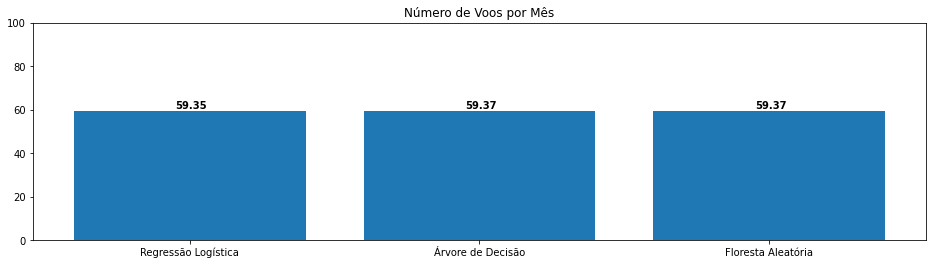

In [137]:
result = [round_accuracy(accuracy_lr * 100), round_accuracy(accuracy_dt * 100), round_accuracy(accuracy_rf * 100)]
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.bar(["Regressão Logística", "Árvore de Decisão", "Floresta Aleatória"], result)
ax.set_title('Número de Voos por Mês')
ax.set_ylim([0, 100])

for index, value in enumerate(result):
    plt.text(index - 0.05, value + 1, str(value), color='black', fontweight='bold')

plt.show()

# Recomendações

Para os próximos trabalhos recomendamos utilizar o processo de validação cruzada para otimização dos parâmetros para os modelos preditivos a fim de aprimorar seus resultados